In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #this can also be written as "from matplotlib import pyplot as plt"
import numpy as np

QUESTION 1

In [ ]:
# Read relevant files
pd.read_csv("movie.csv")

In [ ]:
# Read in dataset into a named file
movie = pd.read_csv("movie.csv", index_col= 0) 
movie

In [ ]:
#To know the number of rows and columns of the data
movie.shape

Question 1a How many movies belong to one genre

In [ ]:
#Step 1: To identify the various data types across each column
movie.dtypes

In [ ]:
#Step 2: Based on knowledge of data types, sum up numeric columns alone, which translates to genre columns
movie_sum = movie.sum(numeric_only=True)
movie_sum


In [ ]:
#Step 3: Plot a bar chart data of the number of movies per genre
movie_sum.plot(kind = 'bar', title= "Number of movies per genre", color="purple")
plt.autoscale(enable= True, axis="y")
plt.ylim(10, 800)

QUESTION 1b - which movies have more than 1 genre

In [ ]:
#Step 1: Drop unnescesary columns from a dataset
movie_drop = movie.drop(columns= ["release date","movie title"])
movie_drop

In [ ]:
#Step 2: Add up individual columns of each row and make the result a new column
#(axis = 1) means row-wise calculations
movie_int ["Total Genre"] = movie_drop.sum(axis=1) 
movie_int

In [ ]:
#Step 3:Generate a new column(Genre>1) based on a conditional arrangement(x>1) of the old column(Total Genre)
movie_int["Genre > 1"] = movie_int["Total Genre"].apply(lambda x:x if x>1 else None )
movie_int

In [ ]:
#Step 4: to add column "movie title" back to the new table 
movie_int["movie title"] = movie["movie title"]
movie_int

In [ ]:
#Step 5: to reposition column "movie title" to a specific position, index 2
# you remove the column from its initial position and insert it at index 2

cols = list(movie_int.columns)
cols.insert(0, cols.pop(cols.index("movie title")))
#Step 6: to reorder the DataFrame
movie_reorder= movie_int[cols]
movie_reorder

In [ ]:
#Step 7: to select columns out to of the existing table(movie_int) to make a new table
# Using the square bracket method, into a new table
movie_table = movie_int[["movie title","Total Genre" ,"Genre > 1"] ] 
movie_table

In [ ]:
#Step 8: to remove columns with "none" entries in the "Genre > 1" column
movie_table = movie_table[movie_table["Genre > 1"].notnull()]
movie_table

In [ ]:
#Step 9: Extract desired columns- movies with more than 1 genre
movie_genres = movie_table.filter([ "movie title", "Genre > 1"])
movie_genres

QUESTION 1c- which genre is most liked by users


In [18]:
#Step 1: Read in data into a named file('ratings')
ratings= pd.read_csv ("ratings.csv")

In [ ]:
#Step 2: Merge relevant files using inner join 
movie_merge = pd.merge(movie, ratings ,on= ["movie id"], how="inner")
movie_merge

In [ ]:
#Step 3: Select rows of movies with the highest ratings (5 star ratings), and save results into a new column('Genre rating')
movie_merge["Genre rating"]= movie_merge["rating"].apply(lambda x:x if x >4 else None)
movie_merge

In [ ]:
#Step 4: Remove 'none' enteries from the rows
movie_star= movie_merge[movie_merge["Genre rating"].notnull()]
movie_star

In [ ]:
# Step 5: Remove non- integer columns (so that calculations can be possible), and create a new table
movie_minus =movie_star.drop(columns= ["movie id", "user id","movie title", "release date", "rating", "timestamp", "Genre rating" ])
movie_minus

In [ ]:
# Step 6: Add up all the movies in each 5 star genre together
movie_sum = movie_minus.sum(numeric_only=True)
movie_sum

In [ ]:
#Step 7: Arrange values in ascending order, so its easy to spot the highest
movie_ascending =  movie_sum.sort_values(ascending=False)
movie_ascending

In [ ]:
#Step 8: Convert results to dataframe possible for plotting
ms = pd.DataFrame(movie_ascending, columns=["number of ratings"])
ms

In [38]:
#Step 9: Create a list of all the genres for plotting purposes
Genre_list = ["Drama", "Comedy","Action", "Romance", "Thriller", "Sci-fi", "War", "Adventure", "Crime", "Mystery", "Childrens", "Musical", "Horror", "Animation", "Film-Noir", "Western", "Documentary", "Fantasy"]

In [ ]:
#Step 10: Add column 'Genre_list' to data frame
ms["Genre"] = Genre_list
ms

In [ ]:
# Step 11: Create the list as a dataframe table which can be used for plotting purposes
movie_pie = pd.DataFrame(ms)
movie_pie

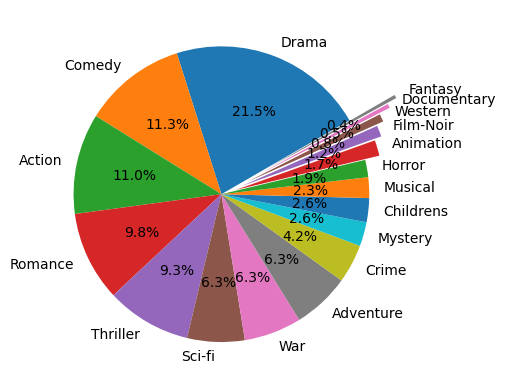

<Figure size 1000x800 with 0 Axes>

In [41]:
#Step 12: Plot a pie chart to display data 
explode = [0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,0.15,0.2,0.28,0.35]
plt.pie(movie_pie["number of ratings"],labels=movie_pie["Genre"], autopct="%1.1f%%", startangle=30, explode=explode, labeldistance= 1.1)
plt.figure(figsize=(10,8))
plt.show()

QUESTION 1d- which movies are the most preferred by users

In [ ]:
#Step 1: Select needed columns from data set with 5 star ratings
# This is because most preferred by users will usually be rated 5 stars
movie_p= movie_star[["movie id","movie title" ,"Drama"]]
movie_p

In [ ]:
#Step 2: Select drama movie rows alone
#Since Drama is the most preferred genre, drama movies are consequently the most preferred
movie_p["drama_value"] = movie_p["Drama"].apply(lambda x:x if x > 0 else None)
movie_p

In [ ]:
# Step 3: Remove none enteries across rows
movie_drama = movie_p[movie_p["drama_value"].notnull()]
movie_drama

In [ ]:
# Step 4: Eliminate duplicate rows 
movie_preferred = movie_drama.drop_duplicates()
movie_preferred

QUESTION 1e- Find which movies are rated most of the times

In [ ]:
#Step 1; Read in data into a named file
users = pd.read_csv("user.csv", index_col=0)
users

In [ ]:
ratings = pd.read_csv("ratings.csv", index_col= 0)
ratings

In [ ]:
#Step 2: Determine the value assigned to the highest rate
ratings["rating"].max()

In [ ]:
#Step 3: Select the highest ratings and put them in a new column('highest_ratings')
ratings["highest_ratings"]  = ratings["rating"].apply(lambda x:x if x > 4 else None)
ratings

In [ ]:
#Step 4: Remove 'none' enteries from a column
rate= ratings[ratings["highest_ratings"].notnull()]
rate

In [ ]:
#Step 5: Merge rate and movie tables, so that movie title column can be added to rate
movie_rate = pd.merge(movie, rate ,on= ["movie id"], how="right")
movie_rate

In [ ]:
# Step 6: Select needed columns (movies with the highest ratings) from the merged table
#Hence movies with the most ratings
high_rate = movie_rate.filter (items = [ "movie title", "movie id", "highest_ratings"])
high_rate

QUESTION 1f- Any relationship between demographic details of users and rating

In [ ]:
#Step 1: Using inner join, merge relevant files
user_rating = pd.merge(users, ratings, on=["user id"], how = "inner")
user_rating

In [ ]:
#Step 2: Identity shape of data 
user_rating.shape

In [68]:
#Step 3: Drop non-needed columns
user_rating= user_rating.drop(columns=['highest_ratings'])

In [ ]:
#Step 4: Translate data into a correlation matrix for numeric columns
user_drop= user_rating.corr(numeric_only=True)
user_drop

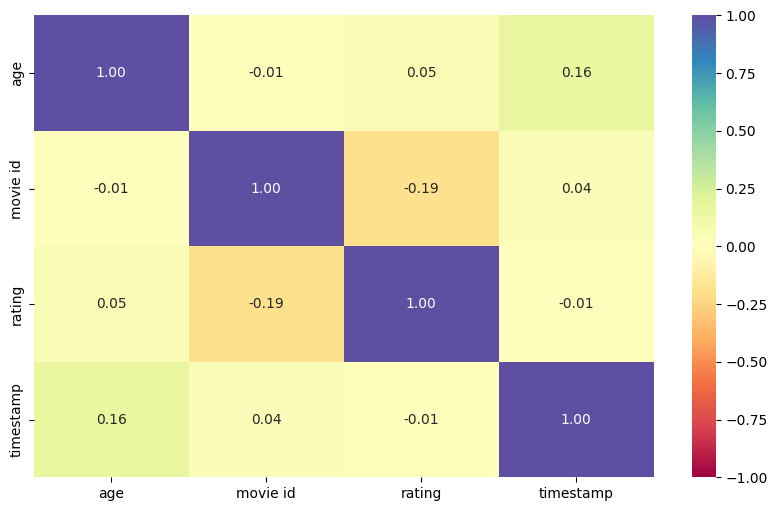

In [73]:
#Step 5: Use correlation to observe any similarities 
plt.figure(figsize= (10,6))
sns.heatmap(user_drop, annot =True, vmin=-1, vmax=1, fmt=".2f", cmap= "Spectral" )
plt.show()